In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# from IPython.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))

from astropy.io import fits
import astropy.table as table
from astropy.io import ascii

from astropy import units as u

from collections import Counter
import astropy.coordinates as coord

In [2]:
plt.style.use('std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [3]:
## loads lasted versions from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
ufsc = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ufsc.csv')

In [4]:
## loads versions locally 
dsph_mw = table.Table.read('data/dwarf_mw.csv')
dsph_m31 = table.Table.read('data/dwarf_m31.csv')
dsph_lf = table.Table.read('data/dwarf_local_field.csv')
ufsc = table.Table.read('data/gc_ufsc.csv')

In [ ]:
## dsph_mw = MW dwarf galaxies (most distant is Eridanus 2)
## dsph_m31 = M31 dwarf galaxies, two And 18 and And 28 are possible local field dwarfs
## dsph_lf = Local field dwarf galaxies (D ~< 3 Mpc)
## ufsc = ultra-faint star clusters, possible star clusters found after Harris catalog in the Galactic halo (|b|>10 deg), Koposov 1 and 2 are included but are in the Harris 2010 catalog, many of these objects are 

In [5]:
## M_V -> L_V
def lum(m_x, m_x_sun=4.83):
    return pow(10., -0.4*(m_x - m_x_sun) )

In [6]:
dsph_mw['mass_dynamical'] = dsph_mw['vlos_sigma']**2*930*dsph_mw['rhalf']*np.sqrt(1.-dsph_mw['ellipticity'])* dsph_mw['distance']*np.pi/180./60.*1000.
dsph_mw['mass_dynamical_ul'] = dsph_mw['vlos_sigma_ul']**2*930*dsph_mw['rhalf']*np.sqrt(1.-dsph_mw['ellipticity'])* dsph_mw['distance']*np.pi/180./60.*1000.


In [7]:
dsph_mw['mass_HI_ul'] = 235600*dsph_mw['flux_HI_ul']*(dsph_mw['distance']/1000.)**2

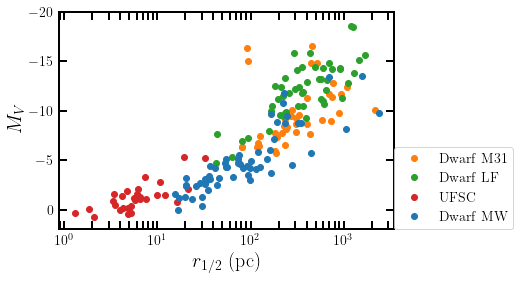

In [8]:
## size-luminosity plots
plt.errorbar(dsph_mw['rhalf_sph_physical'], dsph_mw['MV'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.plot(dsph_m31['rhalf_sph_physical'], dsph_m31['MV'], 'o', label=r'${\rm Dwarf~M31}$')
plt.plot(dsph_lf['rhalf_sph_physical'],dsph_lf['MV'], 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['rhalf_sph_physical'], ufsc['MV'], 'o',label=r'${\rm UFSC}$')
plt.gca().set_xscale('log')
plt.gca().invert_yaxis()
plt.gca().set_xlabel(r'$r_{1/2}~({\rm pc})$')
plt.gca().set_ylabel(r'$M_V$')
plt.legend(loc=(1,0))
plt.ylim(2, -20)
plt.show()

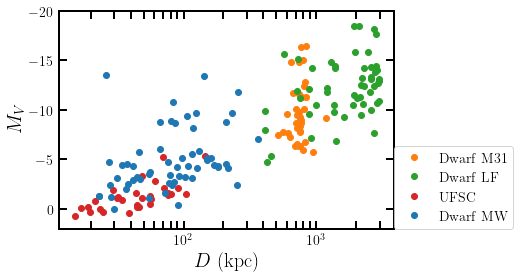

In [9]:
## distance-luminosity plots
plt.errorbar(dsph_mw['distance'], dsph_mw['MV'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.plot(dsph_m31['distance'], dsph_m31['MV'], 'o', label=r'${\rm Dwarf~M31}$')
plt.plot(dsph_lf['distance'],dsph_lf['MV'], 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['distance'], ufsc['MV'], 'o',label=r'${\rm UFSC}$')
plt.gca().set_xscale('log')
plt.gca().invert_yaxis()
plt.gca().set_xlabel(r'$D~({\rm kpc})$')
plt.gca().set_ylabel(r'$M_V$')
plt.legend(loc=(1,0))
plt.ylim(2, -20)
plt.show()

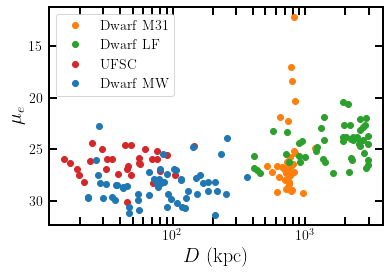

In [10]:
## distance versus average surface brightness
plt.errorbar(dsph_mw['distance'], dsph_mw['surface_brightness_rhalf'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.plot(dsph_m31['distance'], dsph_m31['surface_brightness_rhalf'], 'o', label=r'${\rm Dwarf~M31}$')
plt.plot(dsph_lf['distance'],dsph_lf['surface_brightness_rhalf'], 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['distance'], ufsc['surface_brightness_rhalf'], 'o',label=r'${\rm UFSC}$')
plt.gca().set_xscale('log')
plt.gca().invert_yaxis()
plt.gca().set_xlabel(r'$D~({\rm kpc})$')
plt.gca().set_ylabel(r'$\mu_e$')
plt.legend(loc=2)
# plt.ylim(2, -20)

plt.show()

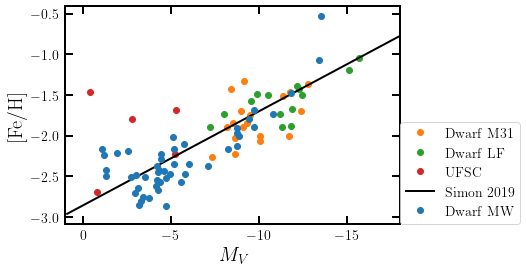

In [11]:
## mass/luminosity- metallicity 
plt.errorbar(dsph_mw['MV'], dsph_mw['metallicity'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.plot(dsph_m31['MV'], dsph_m31['metallicity'], 'o', label=r'${\rm Dwarf~M31}$')
plt.plot(dsph_lf['MV'],dsph_lf['metallicity'], 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['MV'], ufsc['metallicity'], 'o',label=r'${\rm UFSC}$')
# plt.gca().set_xscale('log')
plt.gca().invert_xaxis()
plt.gca().set_ylabel(r'${\rm [Fe/H]}$')
## luminoisty-metallicity relation from Simon 2019
## https://ui.adsabs.harvard.edu/abs/2019ARA%26A..57..375S/abstract
x = np.arange( -20,1, .1)
plt.plot(x,-1.68 + 0.29 * np.log10(lum(x)/1e6), c='k', lw=2, label=r'${\rm Simon~2019}$')
plt.gca().set_xlabel(r'$M_V$')
plt.legend(loc=(1,0))
plt.xlim(1, -18)
# plt.
plt.show()

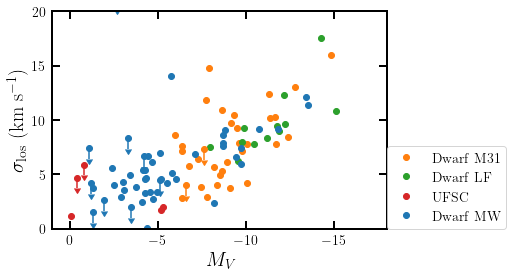

In [12]:
## MV vs velocity dispersion
plt.errorbar(dsph_mw['MV'], dsph_mw['vlos_sigma'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.errorbar(dsph_mw['MV'], dsph_mw['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:blue' )
plt.plot(dsph_m31['MV'], dsph_m31['vlos_sigma'], 'o', label=r'${\rm Dwarf~M31}$')
plt.errorbar(dsph_m31['MV'], dsph_m31['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:orange' )
plt.plot(dsph_lf['MV'],dsph_lf['vlos_sigma'], 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['MV'], ufsc['vlos_sigma'], 'o',label=r'${\rm UFSC}$')
plt.errorbar(ufsc['MV'], ufsc['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:red' )
# plt.gca().set_xscale('log')
plt.gca().invert_xaxis()
plt.gca().set_ylabel(r'$\sigma_{\rm los}~({\rm km~s^{-1}})$')
plt.gca().set_xlabel(r'$M_V$')
plt.legend(loc=(1,0))
plt.xlim(1, -18)
plt.ylim(0, 20)
plt.show()

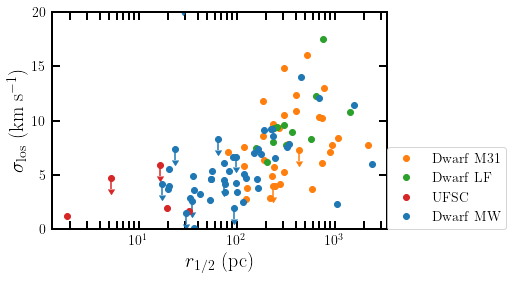

In [13]:
## size vs velocity dispersion
plt.errorbar(dsph_mw['rhalf_sph_physical'], dsph_mw['vlos_sigma'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.errorbar(dsph_mw['rhalf_sph_physical'], dsph_mw['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:blue' )
plt.plot(dsph_m31['rhalf_sph_physical'], dsph_m31['vlos_sigma'], 'o', label=r'${\rm Dwarf~M31}$')
plt.errorbar(dsph_m31['rhalf_sph_physical'], dsph_m31['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:orange' )
plt.plot(dsph_lf['rhalf_sph_physical'],dsph_lf['vlos_sigma'], 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['rhalf_sph_physical'], ufsc['vlos_sigma'], 'o',label=r'${\rm UFSC}$')
plt.errorbar(ufsc['rhalf_sph_physical'], ufsc['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:red' )
plt.gca().set_xscale('log')
plt.gca().set_ylabel(r'$\sigma_{\rm los}~({\rm km~s^{-1}})$')
plt.gca().set_xlabel(r'$r_{1/2}~({\rm pc})$')
plt.legend(loc=(1,0))
# plt.xlim(2, -18)
plt.ylim(0, 20)
plt.show()

/Users/apace/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


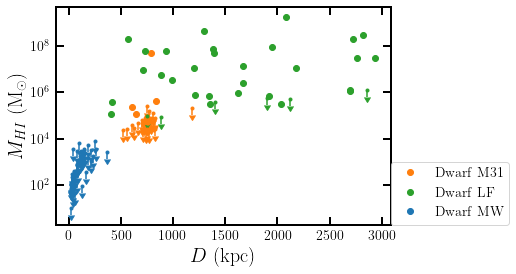

In [14]:
plt.errorbar(dsph_mw['distance'], 10**dsph_mw['mass_HI'], fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.errorbar(dsph_mw['distance'], 235600*dsph_mw['flux_HI_ul']*(dsph_mw['distance']/1000.)**2, fmt='.', yerr=235600*dsph_mw['flux_HI_ul']*(dsph_mw['distance']/1000.)**2/2., uplims=True, c='tab:blue' )
plt.errorbar(dsph_mw['distance'], 10**dsph_mw['mass_HI'], fmt='o', yerr=1, uplims=True, c='tab:blue' )
plt.plot(dsph_m31['distance'], 10**dsph_m31['mass_HI'], 'o', label=r'${\rm Dwarf~M31}$')
plt.errorbar(dsph_m31['distance'], 235600*dsph_m31['flux_HI_ul']*(dsph_m31['distance']/1000.)**2, fmt='.', yerr=235600*dsph_m31['flux_HI_ul']*(dsph_m31['distance']/1000.)**2/2, uplims=True, c='tab:orange' )
plt.plot(dsph_lf['distance'],10**dsph_lf['mass_HI'], 'o', label=r'${\rm Dwarf~LF}$')
plt.errorbar(dsph_lf['distance'], 235600*dsph_lf['flux_HI_ul']*(dsph_lf['distance']/1000.)**2, fmt='.', yerr=235600*dsph_lf['flux_HI_ul']*(dsph_lf['distance']/1000.)**2/2., uplims=True, c='tab:green' )
# plt.plot(ufsc['distance'], ufsc['mass_HI'], 'o',label=r'${\rm UFSC}$')
# plt.errorbar(ufsc['distance'], ufsc['vlos_sigma_ul'], fmt='o', yerr=1, uplims=True, c='tab:red' )
# plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
# plt.gca().invert_xaxis()
plt.gca().set_ylabel(r'$M_{H I}~({\rm M_{\odot}})$')
plt.gca().set_xlabel(r'$D~({\rm kpc})$')
plt.legend(loc=(1,0))
# plt.xlim(2, -18)
# plt.ylim(0, 20)
plt.show()

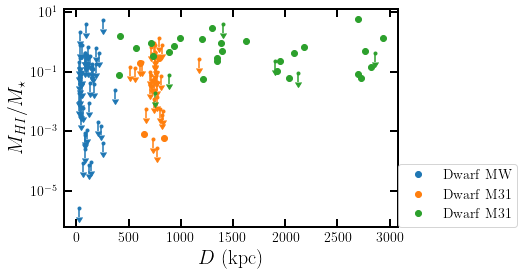

In [15]:
plt.errorbar(dsph_mw['distance'], 10**dsph_mw['mass_HI']/(2.*lum(dsph_mw['MV'])), fmt='o', label=r'${\rm Dwarf~MW}$', )
plt.errorbar(dsph_mw['distance'], 235600*dsph_mw['flux_HI_ul']*(dsph_mw['distance']/1000.)**2/(2.*lum(dsph_mw['MV'])), fmt='.', yerr=235600*dsph_mw['flux_HI_ul']*(dsph_mw['distance']/1000.)**2/2./(2.*lum(dsph_mw['MV'])), uplims=True, c='tab:blue' )

plt.errorbar(dsph_m31['distance'], 10**dsph_m31['mass_HI']/(2.*lum(dsph_m31['MV'])), fmt='o', label=r'${\rm Dwarf~M31}$',c='tab:orange' )
plt.errorbar(dsph_m31['distance'], 235600*dsph_m31['flux_HI_ul']*(dsph_m31['distance']/1000.)**2/(2.*lum(dsph_m31['MV'])), fmt='.', yerr=235600*dsph_m31['flux_HI_ul']*(dsph_m31['distance']/1000.)**2/2./(2.*lum(dsph_m31['MV'])), uplims=True, c='tab:orange' )

plt.errorbar(dsph_lf['distance'], 10**dsph_lf['mass_HI']/(2.*lum(dsph_lf['MV'])), fmt='o', label=r'${\rm Dwarf~M31}$',c='tab:green' )
plt.errorbar(dsph_lf['distance'], 235600*dsph_lf['flux_HI_ul']*(dsph_lf['distance']/1000.)**2/(2.*lum(dsph_lf['MV'])), fmt='.', yerr=235600*dsph_lf['flux_HI_ul']*(dsph_lf['distance']/1000.)**2/2./(2.*lum(dsph_lf['MV'])), uplims=True, c='tab:green' )
plt.gca().set_yscale('log')
# plt.gca().invert_xaxis()
plt.gca().set_ylabel(r'$M_{H I}/M_{\star}$')
plt.gca().set_xlabel(r'$D~({\rm kpc})$')
plt.legend(loc=(1,0))
# plt.xlim(2, -18)
# plt.ylim(0, 20)
plt.show()

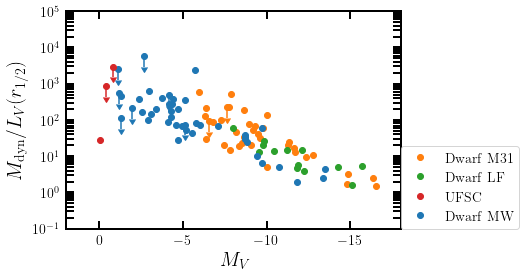

In [16]:
plt.errorbar(dsph_mw['MV'], dsph_mw['mass_dynamical']/lum(dsph_mw['MV'])/2., fmt='o', label=r'${\rm Dwarf~MW}$', )

plt.errorbar(dsph_mw['MV'], dsph_mw['mass_dynamical_ul']/lum(dsph_mw['MV'])/2., fmt='o', yerr= dsph_mw['mass_dynamical_ul']/lum(dsph_mw['MV'])/2./2., uplims=True, c='tab:blue' )
plt.plot(dsph_m31['MV'], dsph_m31['vlos_sigma']**2*930*dsph_m31['rhalf']*np.sqrt(1.-dsph_m31['ellipticity'])* dsph_m31['distance']*np.pi/180./60.*1000./lum(dsph_m31['MV']), 'o', label=r'${\rm Dwarf~M31}$')
x = dsph_m31['vlos_sigma_ul']**2*930*dsph_m31['rhalf']*np.sqrt(1.-dsph_m31['ellipticity'])* dsph_m31['distance']*np.pi/180./60.*1000./lum(dsph_m31['MV'])
plt.errorbar(dsph_m31['MV'], x, fmt='o', yerr=x/2., uplims=True, c='tab:orange' )
plt.plot(dsph_lf['MV'],dsph_lf['vlos_sigma']**2*930*dsph_lf['rhalf']*np.sqrt(1.-dsph_lf['ellipticity'])* dsph_lf['distance']*np.pi/180./60.*1000./lum(dsph_lf['MV']), 'o', label=r'${\rm Dwarf~LF}$')
plt.plot(ufsc['MV'], ufsc['vlos_sigma']**2*930*ufsc['rhalf']*np.sqrt(1.-ufsc['ellipticity'])* ufsc['distance']*np.pi/180./60.*1000./lum(ufsc['MV']), 'o',label=r'${\rm UFSC}$')
x=ufsc['vlos_sigma_ul']**2*930*ufsc['rhalf']*np.sqrt(1.-ufsc['ellipticity'])* ufsc['distance']*np.pi/180./60.*1000./lum(ufsc['MV'])
plt.errorbar(ufsc['MV'], x, fmt='o', yerr=x/2, uplims=True, c='tab:red' )
plt.gca().set_yscale('log')
plt.gca().invert_xaxis()
plt.gca().set_ylabel(r'$M_{\rm dyn}/L_V(r_{1/2})$')

plt.gca().set_xlabel(r'$M_V$')
plt.legend(loc=(1,0))
plt.xlim(2, -18)
plt.ylim(.1, 1e5)
# plt.ylim(0, 20)
plt.show()

In [17]:
dis_name = table.Table.read("https://raw.githubusercontent.com/apace7/local_volume_database/main/data/name_discovery.csv")

In [19]:
year_dwarf_mw = dis_name[dis_name['table']=='dwarf_mw']
year_dwarf_m31 = dis_name[dis_name['table']=='dwarf_m31']
print(len(year_dwarf_mw), len(year_dwarf_m31))

60 39


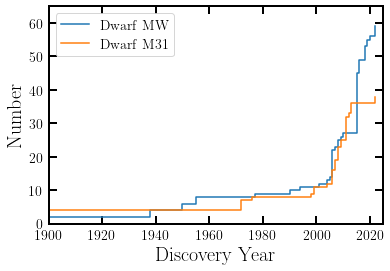

In [20]:
sorted_data = np.sort(year_dwarf_mw['discovery_year']) 
plt.step(sorted_data, np.arange(sorted_data.size), label=r'${\rm Dwarf~MW}$')  
sorted_data = np.sort(year_dwarf_m31['discovery_year']) 
plt.step(sorted_data, np.arange(sorted_data.size), label=r'${\rm Dwarf~M31}$')  
# plt.step(sorted_data[::-1], np.arange(sorted_data.size)/len(sorted_data))  
plt.xlim(1900, 2025)
plt.ylim(0, 65)
plt.legend(loc=2)
plt.xlabel(r'${\rm Discovery~Year}$')
plt.ylabel(r'${\rm Number}$')
plt.show()

In [24]:
coord.galactocentric_frame_defaults.set('v4.0')
gc_frame = coord.Galactocentric()

In [49]:
c_dsph_mw = coord.SkyCoord(ra=dsph_mw['ra']*u.deg, dec=dsph_mw['dec']*u.deg,  frame='icrs', 
                      distance=dsph_mw['distance']*u.kpc, pm_ra_cosdec=dsph_mw['pmra']*u.mas/u.yr,pm_dec=dsph_mw['pmdec']*u.mas/u.yr)
c_dsph_m31 = coord.SkyCoord(ra=dsph_m31['ra']*u.deg, dec=dsph_m31['dec']*u.deg,  frame='icrs', 
                      distance=dsph_m31['distance']*u.kpc)
c_dsph_lf = coord.SkyCoord(ra=dsph_lf['ra']*u.deg, dec=dsph_lf['dec']*u.deg,  frame='icrs', 
                      distance=dsph_lf['distance']*u.kpc)
c_ufsc = coord.SkyCoord(ra=ufsc['ra']*u.deg, dec=ufsc['dec']*u.deg,  frame='icrs', 
                      distance=ufsc['distance']*u.kpc)

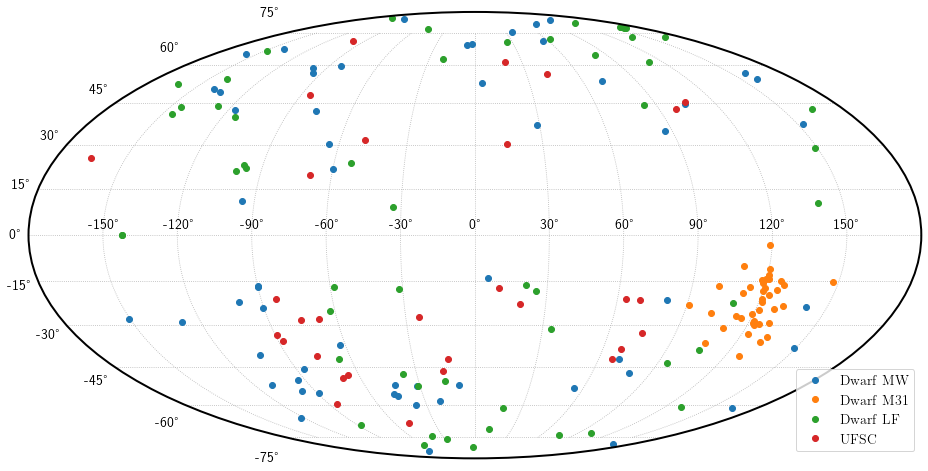

In [26]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')
ax.plot(c_dsph_mw.galactic.l.wrap_at(180*u.deg).rad, c_dsph_mw.galactic.b.rad  , 'o', label=r'${\rm Dwarf~MW}$')
ax.plot(c_dsph_m31.galactic.l.wrap_at(180*u.deg).rad, c_dsph_m31.galactic.b.rad  , 'o', label=r'${\rm Dwarf~M31}$')
ax.plot(c_dsph_lf.galactic.l.wrap_at(180*u.deg).rad, c_dsph_lf.galactic.b.rad  , 'o', label=r'${\rm Dwarf~LF}$')
ax.plot(c_ufsc.galactic.l.wrap_at(180*u.deg).rad, c_ufsc.galactic.b.rad  , 'o', label=r'${\rm UFSC}$')
ax.grid(ls=':')
ax.legend(loc=4)

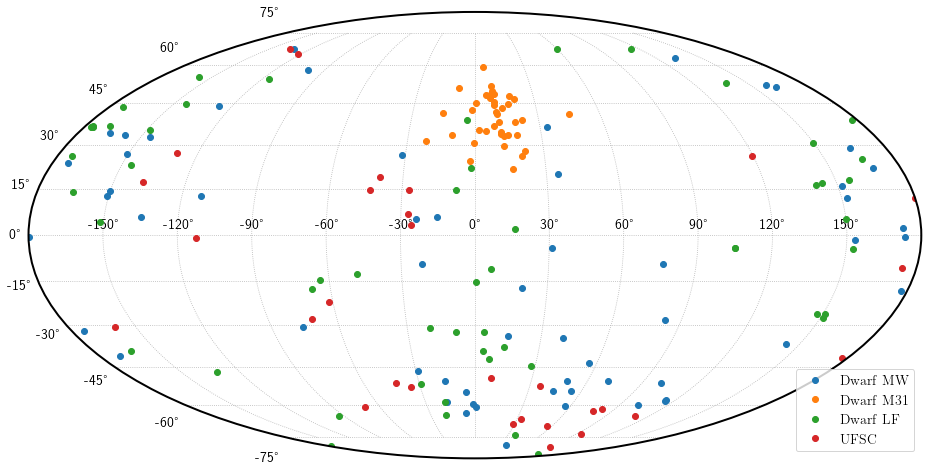

In [27]:
fig = plt.figure(1,figsize=(16,11))
ax = fig.add_subplot(111, projection='mollweide')
ax.plot(c_dsph_mw.ra.wrap_at(180*u.deg).rad, c_dsph_mw.dec.rad  , 'o', label=r'${\rm Dwarf~MW}$')
ax.plot(c_dsph_m31.ra.wrap_at(180*u.deg).rad, c_dsph_m31.dec.rad  , 'o', label=r'${\rm Dwarf~M31}$')
ax.plot(c_dsph_lf.ra.wrap_at(180*u.deg).rad, c_dsph_lf.dec.rad  , 'o', label=r'${\rm Dwarf~LF}$')
ax.plot(c_ufsc.ra.wrap_at(180*u.deg).rad, c_ufsc.dec.rad  , 'o', label=r'${\rm UFSC}$')
ax.grid(ls=':')
ax.legend(loc=4)

In [31]:
from galpy.potential import MWPotential2014, vesc 

/Users/apace/opt/anaconda3/lib/python3.8/site-packages/astroquery/_astropy_init.py:48: AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version.
  update_default_config(



In [28]:
c_gc = c_dsph_mw.transform_to(gc_frame)
dsph_mw['distance_gc'] = np.sqrt(c_gc.cartesian.x.value**2 + c_gc.cartesian.y.value**2 + c_gc.cartesian.z.value**2) 

In [50]:
# c= coord.ICRS(ra=dsph_mw['ra']*u.deg, dec=dsph_mw['dec']*u.deg,  
#                       distance=dsph_mw['distance']*u.kpc, radial_velocity=dsph_mw['vlos_systemic']*u.km/u.s,)
# # def rv_to_gsr(c, v_sun=None):
gal = c_dsph_mw.transform_to(coord.Galactic)
cart_data = gal.data.to_cartesian()
unit_vector = cart_data / cart_data.norm()
v_sun = coord.Galactocentric().galcen_v_sun.to_cartesian()
v_proj = v_sun.dot(unit_vector)

dsph_mw['vel_gsr'] = c_dsph_mw.radial_velocity + v_proj 

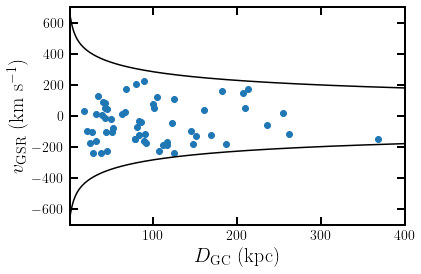

In [56]:
plt.plot(dsph_mw['distance_gc'], dsph_mw['vel_gsr'], 'o')
rad = np.arange(1,400,1)
plt.plot(rad, vesc(MWPotential2014,rad/8.)*220., c='k')
plt.plot(rad, -vesc(MWPotential2014,rad/8.)*220., c='k')
plt.xlim(1,400)
plt.ylim(-700,700)

plt.xlabel(r'$D_{\rm {\rm GC}}~({\rm kpc})$')
plt.ylabel(r'$v_{\rm {\rm GSR}}~({\rm km~s^{-1}})$')
plt.show()

In [53]:
v_sun = coord.CartesianDifferential([11.1,245.,7.25]*u.km/u.s)
gc_frame= coord.Galactocentric(galcen_distance=8.1*u.kpc,
                                   z_sun=25.*u.pc,
                                   galcen_v_sun=v_sun)
cg= c_dsph_mw.transform_to(gc_frame)
cg.representation_type= 'cylindrical'

dsph_mw['vel_3d'] = np.sqrt(cg.d_rho.to(u.km/u.s).value**2 + (cg.d_phi*cg.rho).to(u.km/u.s,        equivalencies=u.dimensionless_angles()).value**2 + cg.d_z.to(u.km/u.s).value**2)
dsph_mw['vel_rad'] = cg.d_rho.to(u.km/u.s).value

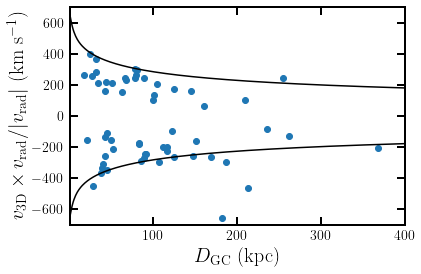

In [55]:
plt.ylabel(r'$v_{\rm {\rm 3D}}\times v_{\rm rad}/ | v_{\rm rad} |~({\rm km~s^{-1}})$')
plt.plot(dsph_mw['distance_gc'], dsph_mw['vel_rad']/abs(dsph_mw['vel_rad'])*dsph_mw['vel_3d'], 'o')
rad = np.arange(1,400,1)
plt.plot(rad, vesc(MWPotential2014,rad/8.)*220., c='k')
plt.plot(rad, -vesc(MWPotential2014,rad/8.)*220., c='k')
plt.xlim(1,400)
plt.ylim(-700,700)
plt.xlabel(r'$D_{\rm {\rm GC}}~({\rm kpc})$')
plt.show()